<a href="https://colab.research.google.com/github/faithfulness121/beginner-project/blob/main/africa_crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading dataset
af=pd.read_csv('/content/African_crises_dataset.csv')
af.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
af.columns

Index(['country_number', 'country_code', 'country', 'year', 'systemic_crisis',
       'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises', 'banking_crisis'],
      dtype='object')

In [ ]:
# exploring dataset

print(af.info())
print(af.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [ ]:
af.isnull().sum()

,0
country_number,0
country_code,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [ ]:
af.duplicated().sum()

np.int64(0)

In [ ]:
#converting categorical columns
af['banking_crisis']=LabelEncoder().fit_transform(af['banking_crisis'])
#af['country']=LabelEncoder().fit_transform(af['country'])
af.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [ ]:
# Handle outliers in 'inflation_annual_cpi' using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower=lower, upper=upper)

af['inflation_annual_cpi'] = cap_outliers(af['inflation_annual_cpi'])
af['exch_usd'] = cap_outliers(af['exch_usd'])
#af_new = cap_outliers(af, 'exch_usd', 'inflation_annual_cpi')

In [ ]:
af.shape

(1059, 14)

In [ ]:
profile=ProfileReport(af,title='Bank crises',explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 41.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:


# Selecting all columns except 'systemic_crisis' as features
X = af.drop(columns=['systemic_crisis', 'country_code', 'country'])

# Selecting 'systemic_crisis' as the target variable
y = af['systemic_crisis']

# we split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Train Using Logistic Regression since the target variable is binary
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#evaluate
model_conf_matrix = confusion_matrix(y_test, y_pred)
model_class_report = classification_report(y_test, y_pred)


print("Confusion Matrix:")
print(model_conf_matrix)
print("\nClassification Report:")
print(model_class_report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[194   2]
 [  3  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       196
           1       0.87      0.81      0.84        16

    accuracy                           0.98       212
   macro avg       0.93      0.90      0.91       212
weighted avg       0.98      0.98      0.98       212

Accuracy: 0.9764150943396226


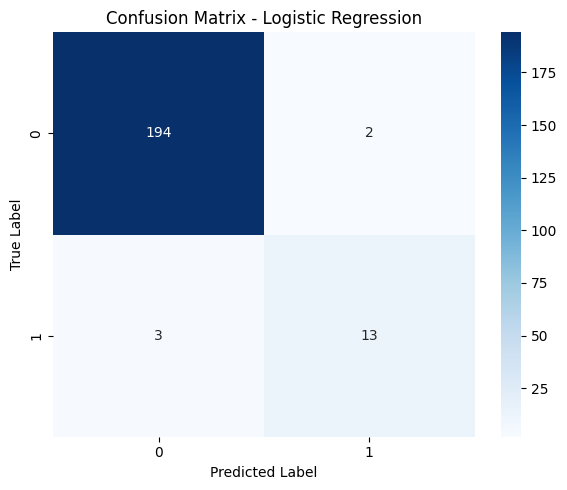

In [ ]:
import numpy as np

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(model_conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()

plt.show()